In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [31]:
# encoding to by asss the utf-8 error that i was getting
spam_df = pd.read_csv('spam.csv',encoding= 'latin-1')

In [32]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
spam_df.shape

(5572, 5)

In [33]:
# Deleting those unwanted columns from our dataset
spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True, axis=1)
spam_df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
# renaming the column names
spam_df.rename(columns = {'v1':'Spam/Ham','v2':'Text'}, inplace = True)
spam_df


,Spam/Ham,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [61]:
from  sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
spam_df['Spam/Ham']= encoder.fit_transform(spam_df['Spam/Ham'])

In [66]:
spam_df.isnull().sum()

Spam/Ham    0
Mail        0
dtype: int64

In [67]:
spam_df.duplicated().sum()

403

In [68]:
# remove duplicates
spam_df = spam_df.drop_duplicates(keep='first')

In [71]:
spam_df.shape


(5169, 2)

In [72]:
# checking total number of spm and not spam mails
spam_df['Spam/Ham'].value_counts()

0    4516
1     653
Name: Spam/Ham, dtype: int64

In [74]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [76]:
spam_df['Char_count'] = spam_df['Mail'].apply(len)

<ipython-input-76-fe3aa6ea29e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['Char_count'] = spam_df['Mail'].apply(len)


In [82]:
spam_df['word_count']=spam_df['Mail'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-82-d74ceed7732c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['word_count']=spam_df['Mail'].apply(lambda x: len(nltk.word_tokenize(x)))


In [83]:
spam_df['Sentence_count']=spam_df['Mail'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-83-7b3760a8149c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['Sentence_count']=spam_df['Mail'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [84]:
spam_df[['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.978139,18.455794,1.965564
std,58.236209,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [87]:
# analyzing ham messages
spam_df[spam_df['Spam/Ham'] == 0][['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459477,17.123782,1.820195
std,56.358140,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [89]:
# analyzing spam messages
spam_df[spam_df['Spam/Ham'] ==1][['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [90]:
# After analyzing both we can see that spam messages are a bit longer as compared to the Ham messages

In [91]:
# Data Preprocessing
# Lowercase
# Tokenization
# removing special characters
# removing stop words and puntuation
# Stemming

In [98]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [119]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [122]:
spam_df['transformed_text'] = spam_df['Mail'].apply(transform_text)
spam_df.head()


<ipython-input-122-e51c2db4176a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['transformed_text'] = spam_df['Mail'].apply(transform_text)


,Spam/Ham,Mail,Alphabet_count,Char_count,word_count,Sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,15,1,nah think goe usf live around though


In [130]:
from wordcloud import WordCloud
wc =  WordCloud(width = 1000, height =1000, min_font_size = 10, background_color = 'white')

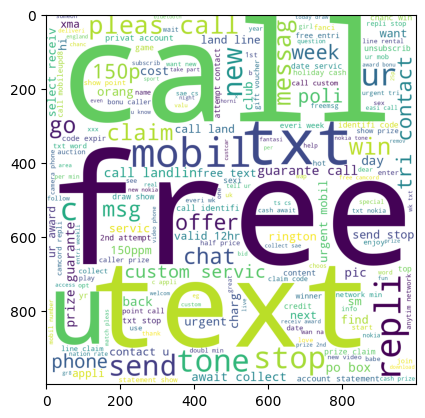

In [131]:
spam_wc = wc.generate(spam_df[spam_df['Spam/Ham']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

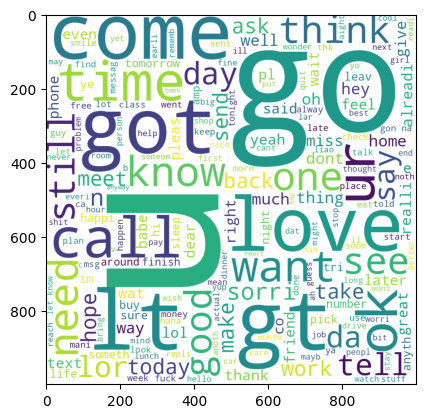

In [133]:
ham_wc = wc.generate(spam_df[spam_df['Spam/Ham']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [136]:
# creating a word counter for spam messegaes
spam_corpus = []
for msg in spam_df[spam_df['Spam/Ham'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [137]:
# total words  in spam messages
len(spam_corpus)

9939

In [143]:
# top 30 words in spammessages
from collections import Counter
Counter(spam_corpus).most_common(30)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [146]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# using toarray as the output of  fit.transform gets us sparse array and we want dense array
X = cv.fit_transform(spam_df['transformed_text']).toarray()

In [148]:
y= spam_df['Spam/Ham'].values


In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [153]:
# Using Naive Bayes algos as they are best for text based data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [154]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [155]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [156]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [157]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [167]:
# instead of using count vector going to try to use Tfidf
tfidf = TfidfVectorizer(max_features=3000)
X2 = tfidf.fit_transform(spam_df['transformed_text']).toarray()
y2= spam_df['Spam/Ham'].values

In [168]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

# Using Naive Bayes algos as they are best for text based data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [169]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [170]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [171]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [166]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
